First of all we will going to import all the required libraries

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

We will going to take two dataset first one is movie dataset in which we will have movie names and the second dataset will have ratings and userID

In [2]:
#read csv file
df = pd.read_csv('movie.csv')

# first few rows of dataset
df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
df.shape

(27278, 3)

So we have 27,278 movies.We don't need genres column so we are dropping that column

In [4]:
# drop genres column
df.drop(['genres'],axis=1,inplace=True)

We need to import our another dataset in which we have ratings for the movie

In [5]:
# import rating dataset
rating = pd.read_csv('rating.csv')

# columns
rating.columns

Index(['userId', 'movieId', 'rating'], dtype='object')

In [6]:
# we need user id, movie id and rating
rating = rating.loc[:,["userId","movieId","rating"]]
rating.head()

,userId,movieId,rating
0,1,2,3.5
1,1,29,3.5
2,1,32,3.5
3,1,47,3.5
4,1,50,3.5


In [7]:
#then merge movie and rating data
df = pd.merge(df,rating)

In [8]:
df.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),3,4.0
1,2,Jumanji (1995),1,3.5
2,2,Jumanji (1995),5,3.0
3,3,Grumpier Old Men (1995),2,4.0
4,6,Heat (1995),4,3.0


As noted here one user has rated one or more than one movie. This means that one movie has been rated by more than one user.

In [9]:
df.shape

(499, 4)

In our kaggle kernel,we don't have much memory so we have to subset our dataset,we are going to take 1M rows

In [10]:
df = df.iloc[:1000000]

In [11]:
df.shape

(499, 4)

In [12]:
# basic stats
df.describe()

,movieId,userId,rating
count,499.000000,499.000000,499.000000
mean,2155.384770,2.424850,3.943888
std,2282.752796,1.280007,0.812093
min,1.000000,1.000000,1.000000
25%,650.500000,1.000000,3.500000
50%,1375.000000,3.000000,4.000000
75%,2806.000000,3.000000,5.000000
max,31696.000000,5.000000,5.000000


## Data Visualization

Let's find the average rating of each movie

In [13]:
df.groupby("title").mean()['rating'].sort_values(ascending=False)

title
1984 (Nineteen Eighty-Four) (1984)                           5.0
Return to Oz (1985)                                          5.0
Lion King, The (1994)                                        5.0
Lord of the Rings: The Fellowship of the Ring, The (2001)    5.0
Lord of the Rings: The Return of the King, The (2003)        5.0
                                                            ... 
This Is Spinal Tap (1984)                                    2.0
Strictly Ballroom (1992)                                     2.0
Cruel Intentions (1999)                                      1.0
Instinct (1999)                                              1.0
Superman IV: The Quest for Peace (1987)                      1.0
Name: rating, Length: 414, dtype: float64

Let's find the number of rating a particular movie has received

In [14]:
df.groupby("title").count()["rating"].sort_values(ascending=False)

title
Terminator 2: Judgment Day (1991)            5
Jurassic Park (1993)                         4
Star Wars: Episode IV - A New Hope (1977)    4
Alien (1979)                                 3
Shawshank Redemption, The (1994)             3
                                            ..
Godsend (2004)                               1
Gods Must Be Crazy, The (1980)               1
Godfather: Part II, The (1974)               1
Godfather, The (1972)                        1
Last Unicorn, The (1982)                     1
Name: rating, Length: 414, dtype: int64

Now we will going to make a datafame in which we will have rating and number of ratings column

In [15]:
ratings=pd.DataFrame(df.groupby("title").mean()['rating'])
ratings['number of ratings']=pd.DataFrame(df.groupby("title").count()["rating"])
print(ratings.head())

                                       rating  number of ratings
title                                                           
1984 (Nineteen Eighty-Four) (1984)        5.0                  1
2001: A Space Odyssey (1968)              4.5                  3
2010: The Year We Make Contact (1984)     4.0                  1
28 Days (2000)                            3.0                  1
28 Days Later (2002)                      3.5                  1


In [16]:
ratings.sort_values(by='rating', ascending=False)

,rating,number of ratings
title,,
1984 (Nineteen Eighty-Four) (1984),5.0,1
Return to Oz (1985),5.0,1
"Lion King, The (1994)",5.0,1
"Lord of the Rings: The Fellowship of the Ring, The (2001)",5.0,1
"Lord of the Rings: The Return of the King, The (2003)",5.0,1
...,...,...
This Is Spinal Tap (1984),2.0,1
Strictly Ballroom (1992),2.0,1
Cruel Intentions (1999),1.0,1


In [17]:
ratings.describe()

,rating,number of ratings
count,414.000000,414.000000
mean,3.878744,1.205314
std,0.772632,0.519704
min,1.000000,1.000000
25%,3.500000,1.000000
50%,4.000000,1.000000
75%,4.250000,1.000000
max,5.000000,5.000000


So from above we can see that we don't have any movie with rating 5

<function matplotlib.pyplot.show(close=None, block=None)>

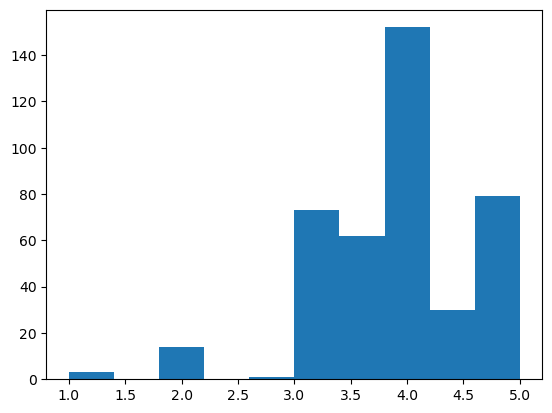

In [18]:
plt.hist(ratings['rating'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

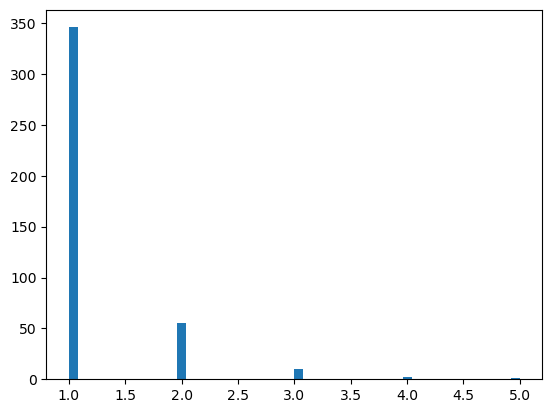

In [19]:
plt.hist(ratings['number of ratings'],bins=50)
plt.show

## Recommender System

In [20]:
# lets make a pivot table in order to make rows are users and columns are movies. And values are rating
pivot_table = df.pivot_table(index = ["userId"],columns = ["title"],values = "rating")
pivot_table.head(5)

title,1984 (Nineteen Eighty-Four) (1984),2001: A Space Odyssey (1968),2010: The Year We Make Contact (1984),28 Days (2000),28 Days Later (2002),"7th Voyage of Sinbad, The (1958)",8MM (1999),Abbott and Costello Meet Frankenstein (1948),"Abyss, The (1989)",Ace Ventura: When Nature Calls (1995),...,Willy Wonka & the Chocolate Factory (1971),"Witches of Eastwick, The (1987)","Witches, The (1990)",Witness (1985),"Wizard of Oz, The (1939)","X-Files: Fight the Future, The (1998)",X2: X-Men United (2003),Yellow Submarine (1968),Yojimbo (1961),Young Frankenstein (1974)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,3.5,NaN,NaN,3.5,4.0,NaN,NaN,NaN,NaN,...,NaN,4.0,3.5,NaN,3.5,NaN,4.0,NaN,3.0,4.0
2,NaN,5.0,NaN,3.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,5.0,4.0,NaN,NaN,NaN,4.0,NaN,3.0,NaN,...,5.0,NaN,NaN,4.0,4.0,5.0,NaN,3.0,NaN,5.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
pivot_table.shape

(5, 414)

Now we will make a function which will recommend the movie with their correlation score.Note that higher the correlation more the movie related to each other

In [22]:
def recommend_movie(movie):
    movie_watched = pivot_table[movie]
    similarity_with_other_movies = pivot_table.corrwith(movie_watched)  # find correlation between "Toy Story (1995)" and other movies
    similarity_with_other_movies = similarity_with_other_movies.sort_values(ascending=False)
    return similarity_with_other_movies.head()

In [23]:
recommend_movie('American President, The (1995)')

C:\Users\kcham\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\kcham\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


title
1984 (Nineteen Eighty-Four) (1984)      NaN
2001: A Space Odyssey (1968)            NaN
2010: The Year We Make Contact (1984)   NaN
28 Days (2000)                          NaN
28 Days Later (2002)                    NaN
dtype: float64